In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2021-08-20T17:00:00,6,Friuli Venezia Giulia,28,9,37,904,941,44,113,...,0.0,6613.0,1284.0,43.0,24.32,3.93,1.71,8.80,-10.00,4.91
543,2021-08-21T17:00:00,6,Friuli Venezia Giulia,30,9,39,899,938,-3,103,...,1.0,7274.0,2002.0,-5.0,23.08,4.16,1.42,5.14,0.00,-0.32
544,2021-08-22T17:00:00,6,Friuli Venezia Giulia,32,9,41,899,940,2,78,...,0.0,4541.0,1503.0,0.0,21.95,4.36,1.72,5.19,0.00,0.21
545,2021-08-23T17:00:00,6,Friuli Venezia Giulia,34,11,45,866,911,-29,25,...,0.0,1476.0,330.0,-33.0,24.44,4.94,1.69,7.58,22.22,-3.09


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 24, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 99
Nuovi tamponi: 7851.0
Percentuale nuovi positivi/nuovi tamponi: 1.3 %
Nuovi guariti: 67.0
Nuovi deceduti: 0.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 35.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 24, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-06-25T17:00:00,6,Friuli Venezia Giulia,13,0,13,222,235,-2,20,...,0.0,5535.0,1033.0,-5.0,0.00,5.53,0.36,1.94,0.00,-0.84
1,2021-06-26T17:00:00,6,Friuli Venezia Giulia,14,0,14,209,223,-12,19,...,0.0,5975.0,1429.0,-13.0,0.00,6.28,0.32,1.33,0.00,-5.11
2,2021-06-27T17:00:00,6,Friuli Venezia Giulia,14,0,14,203,217,-6,8,...,0.0,3114.0,971.0,-6.0,0.00,6.45,0.26,0.82,0.00,-2.69
3,2021-06-28T17:00:00,6,Friuli Venezia Giulia,14,0,14,201,215,-2,3,...,1.0,1454.0,363.0,-2.0,0.00,6.51,0.21,0.83,0.00,-0.92
4,2021-06-29T17:00:00,6,Friuli Venezia Giulia,10,0,10,192,202,-13,16,...,1.0,4700.0,931.0,-9.0,0.00,4.95,0.34,1.72,0.00,-6.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-08-20T17:00:00,6,Friuli Venezia Giulia,28,9,37,904,941,44,113,...,0.0,6613.0,1284.0,43.0,24.32,3.93,1.71,8.80,-10.00,4.91
57,2021-08-21T17:00:00,6,Friuli Venezia Giulia,30,9,39,899,938,-3,103,...,1.0,7274.0,2002.0,-5.0,23.08,4.16,1.42,5.14,0.00,-0.32
58,2021-08-22T17:00:00,6,Friuli Venezia Giulia,32,9,41,899,940,2,78,...,0.0,4541.0,1503.0,0.0,21.95,4.36,1.72,5.19,0.00,0.21
59,2021-08-23T17:00:00,6,Friuli Venezia Giulia,34,11,45,866,911,-29,25,...,0.0,1476.0,330.0,-33.0,24.44,4.94,1.69,7.58,22.22,-3.09


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

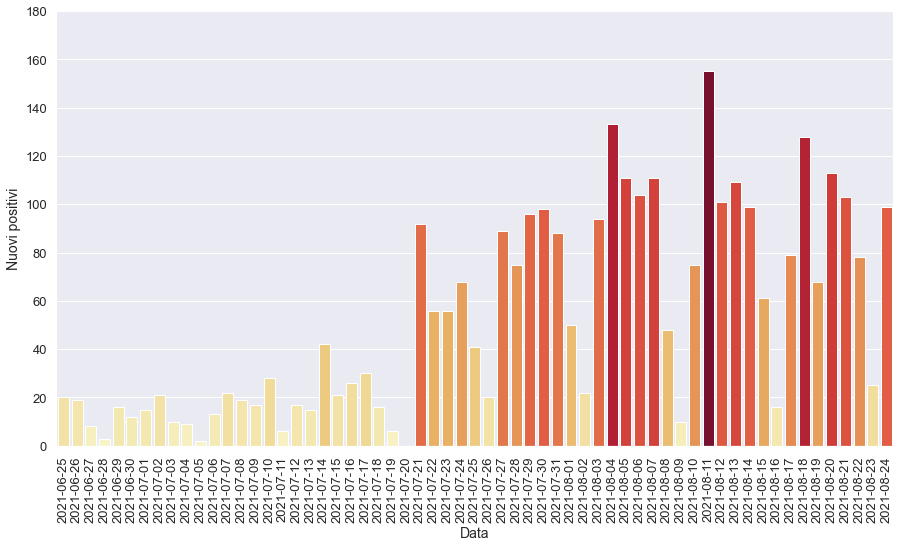

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

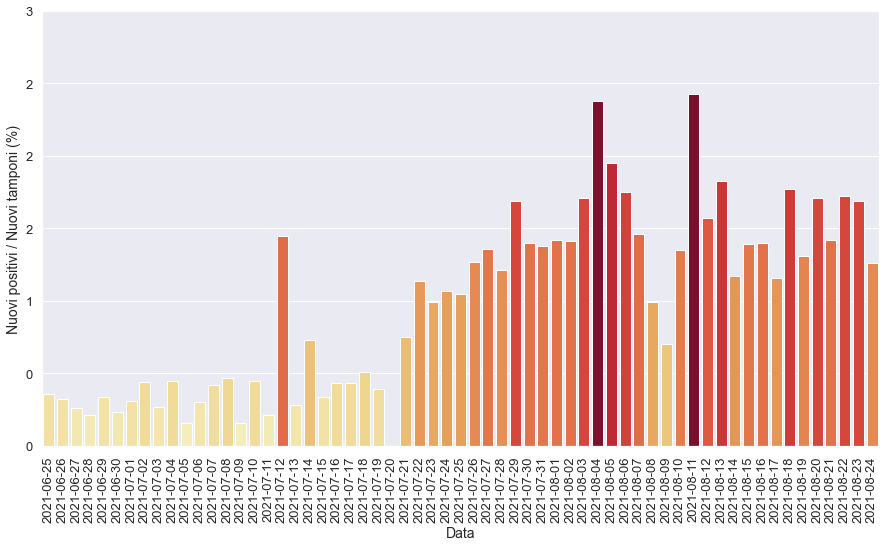

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

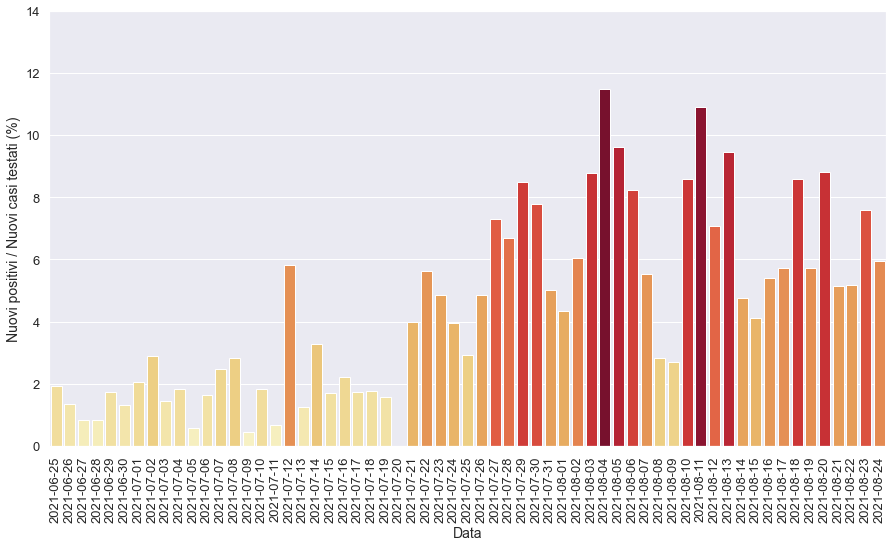

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

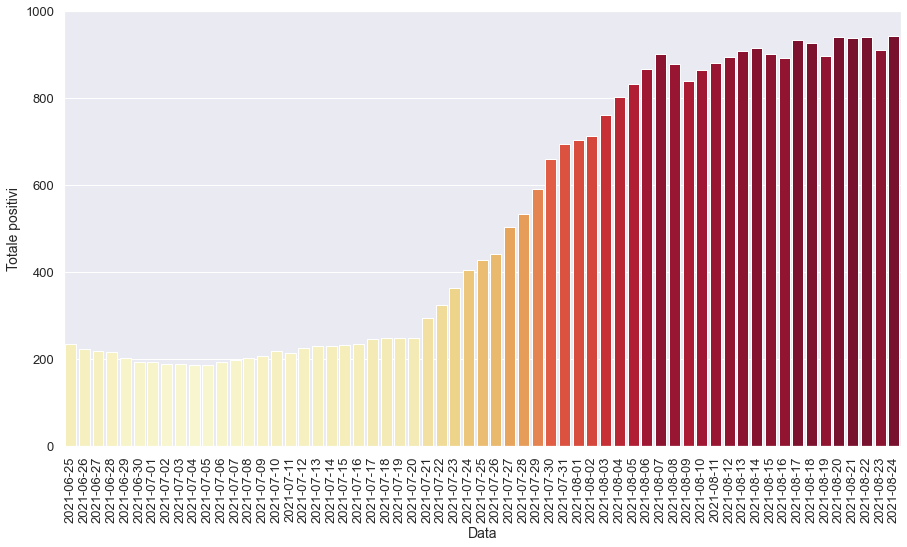

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

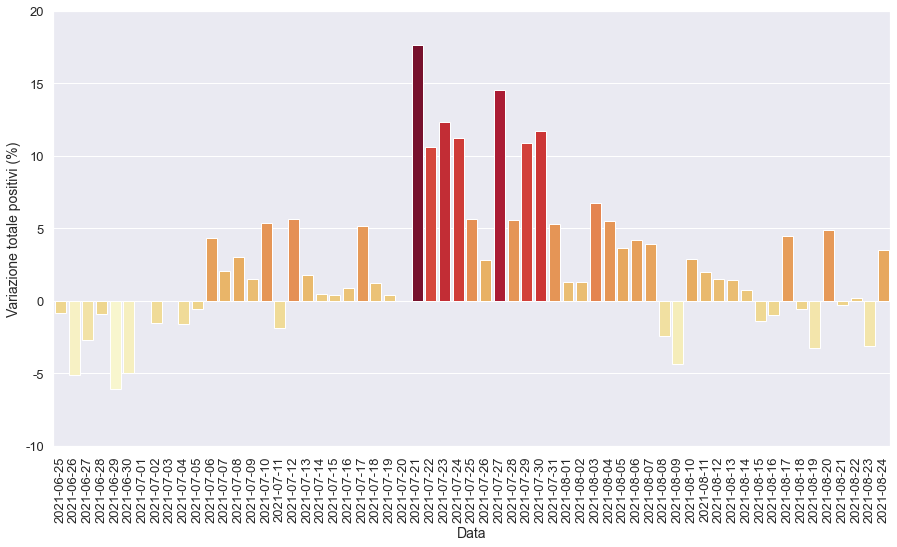

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

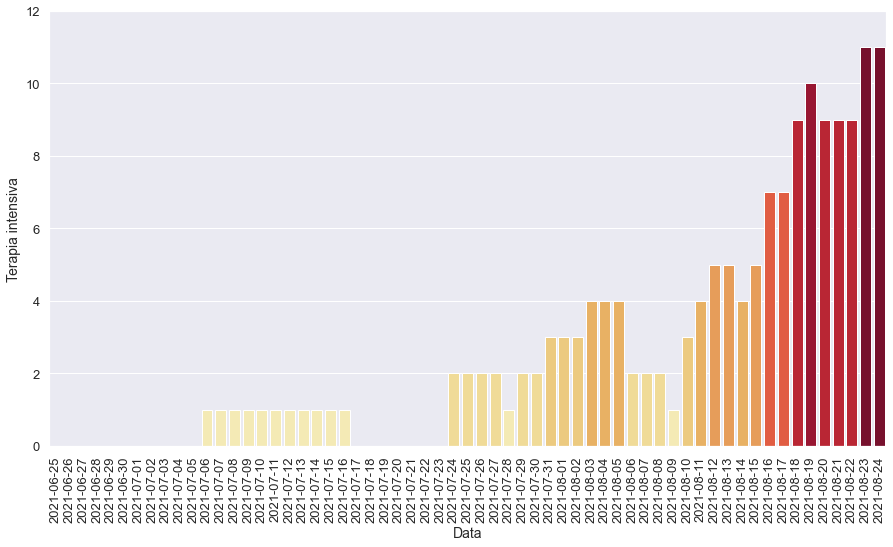

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

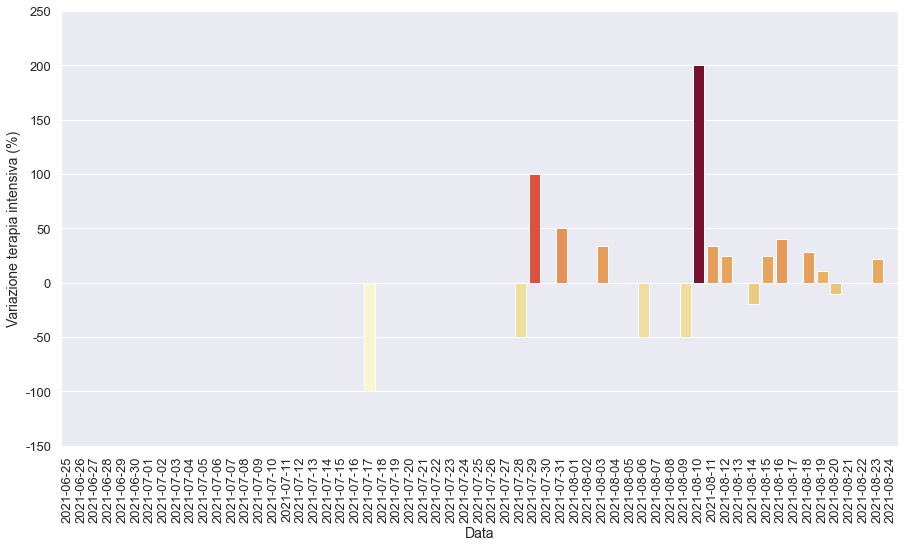

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

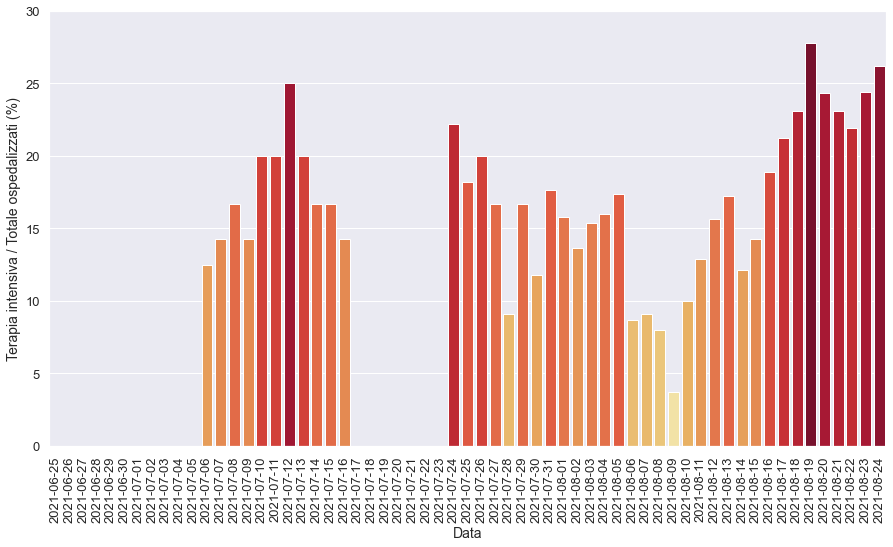

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

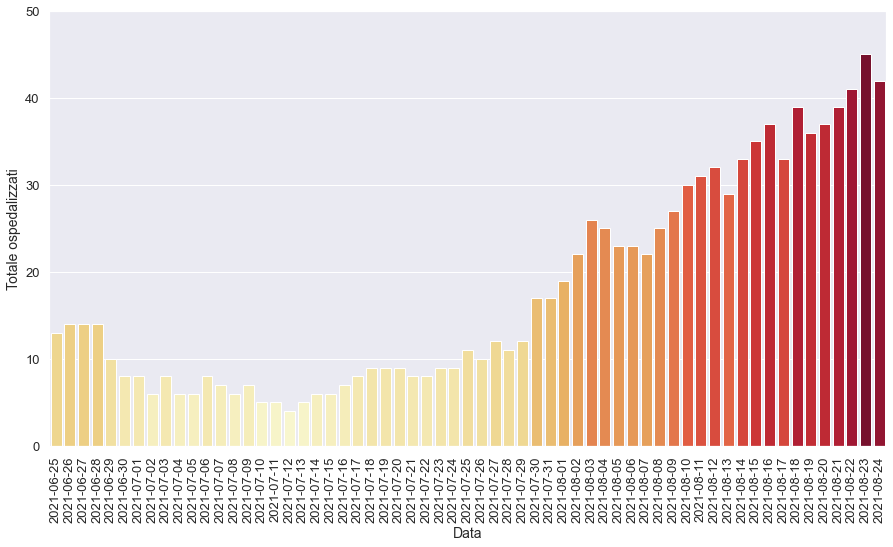

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

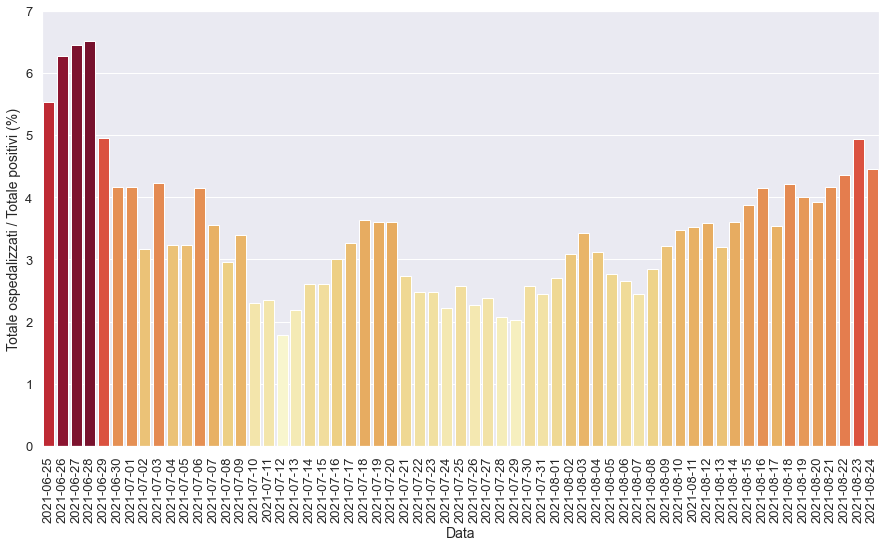

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

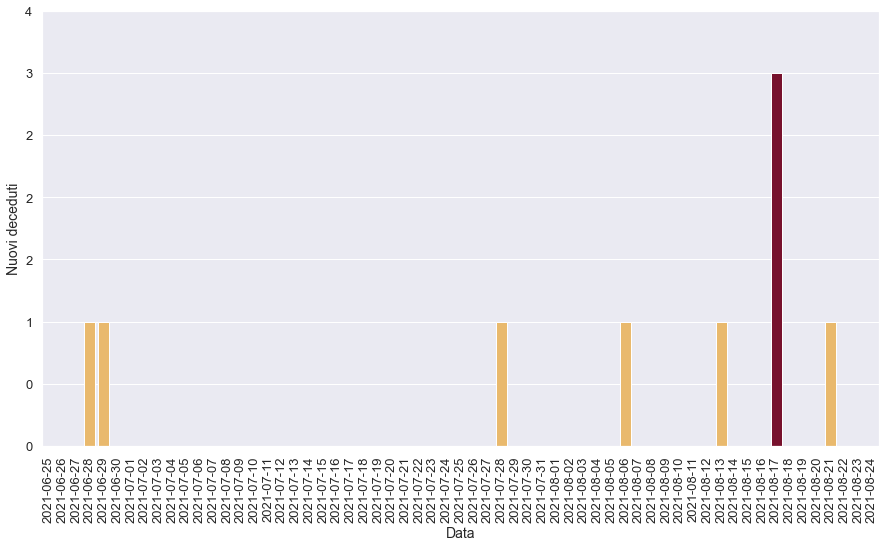

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

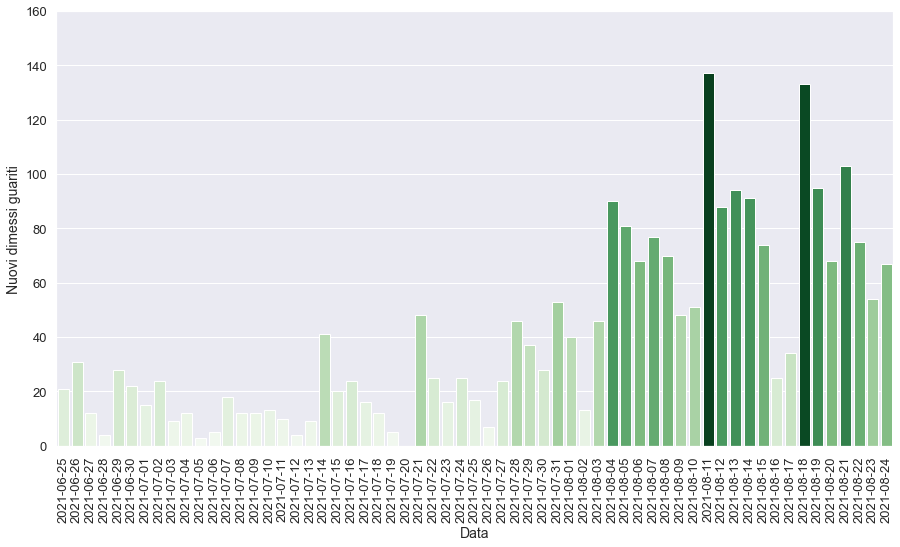

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-07-25T17:00:00,6,Friuli Venezia Giulia,9,2,11,417,428,23,41,...,0.0,3912.0,1403.0,21.0,18.18,2.57,1.05,2.92,0.00,5.68
1,2021-07-26T17:00:00,6,Friuli Venezia Giulia,8,2,10,430,440,12,20,...,0.0,1577.0,412.0,13.0,20.00,2.27,1.27,4.85,0.00,2.80
2,2021-07-27T17:00:00,6,Friuli Venezia Giulia,10,2,12,492,504,64,89,...,0.0,6542.0,1221.0,62.0,16.67,2.38,1.36,7.29,0.00,14.55
3,2021-07-28T17:00:00,6,Friuli Venezia Giulia,10,1,11,521,532,28,75,...,1.0,6182.0,1119.0,29.0,9.09,2.07,1.21,6.70,-50.00,5.56
4,2021-07-29T17:00:00,6,Friuli Venezia Giulia,10,2,12,578,590,58,96,...,0.0,5681.0,1132.0,57.0,16.67,2.03,1.69,8.48,100.00,10.90
5,2021-07-30T17:00:00,6,Friuli Venezia Giulia,15,2,17,642,659,69,98,...,0.0,7015.0,1259.0,64.0,11.76,2.58,1.40,7.78,0.00,11.69
6,2021-07-31T17:00:00,6,Friuli Venezia Giulia,14,3,17,677,694,35,88,...,0.0,6372.0,1750.0,35.0,17.65,2.45,1.38,5.03,50.00,5.31
7,2021-08-01T17:00:00,6,Friuli Venezia Giulia,16,3,19,684,703,9,50,...,0.0,3514.0,1153.0,7.0,15.79,2.70,1.42,4.34,0.00,1.30
8,2021-08-02T17:00:00,6,Friuli Venezia Giulia,19,3,22,690,712,9,22,...,0.0,1565.0,364.0,6.0,13.64,3.09,1.41,6.04,0.00,1.28
9,2021-08-03T17:00:00,6,Friuli Venezia Giulia,22,4,26,734,760,48,94,...,0.0,5502.0,1071.0,44.0,15.38,3.42,1.71,8.78,33.33,6.74


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

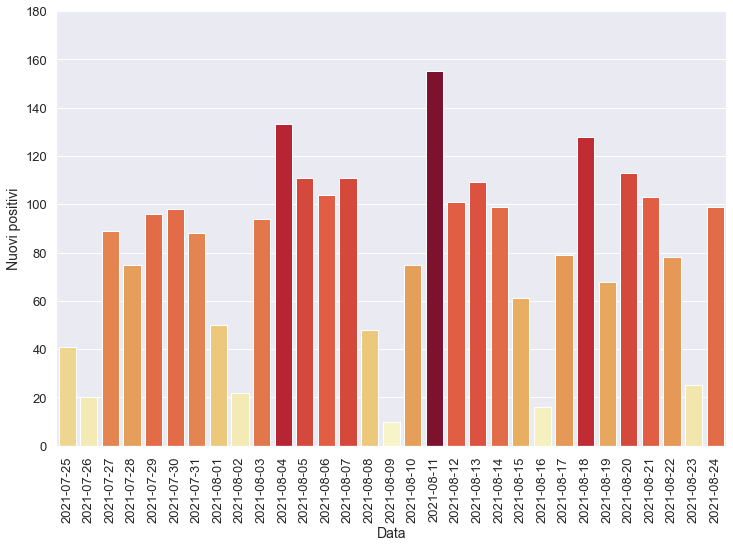

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

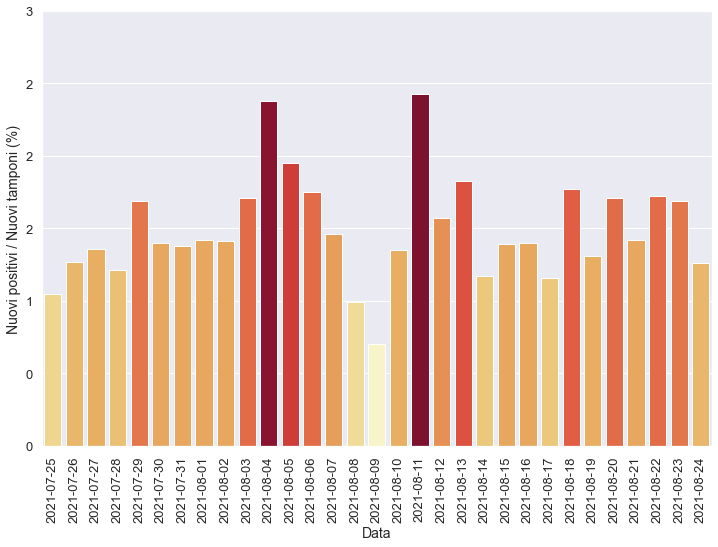

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

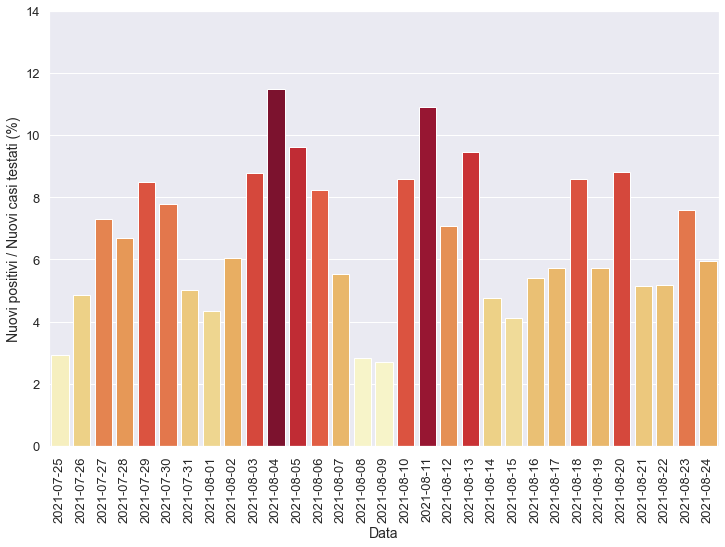

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

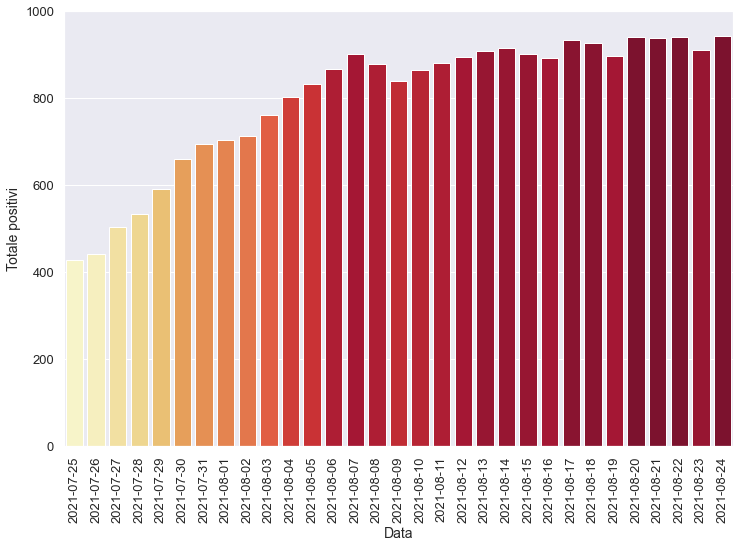

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

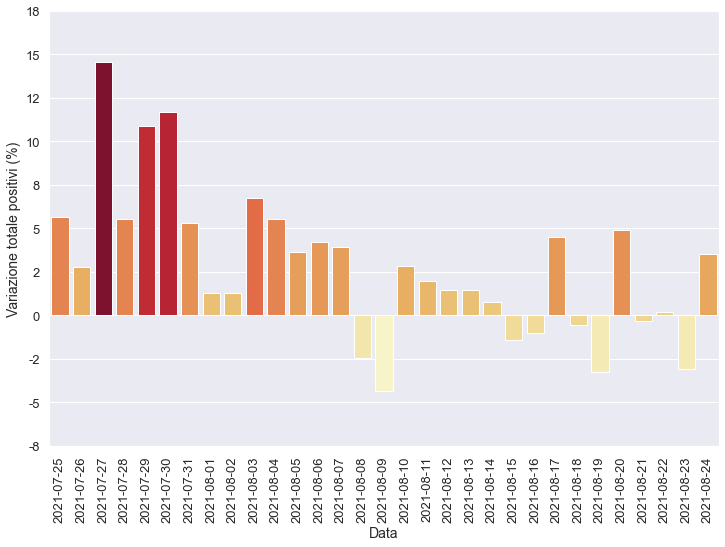

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

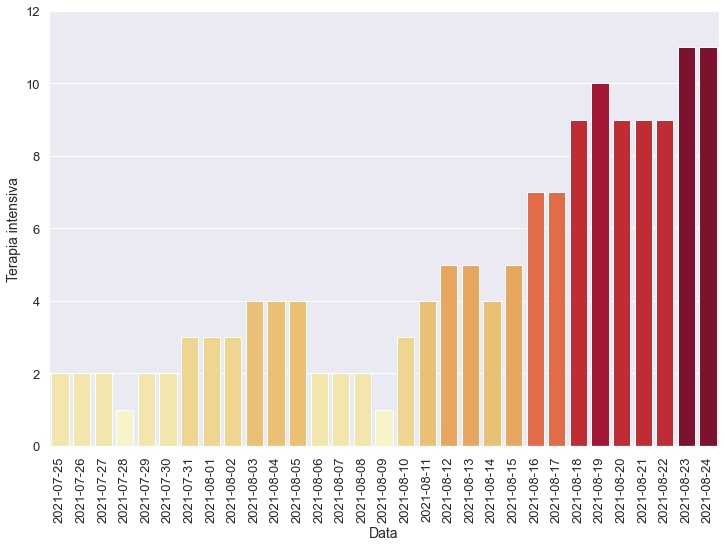

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

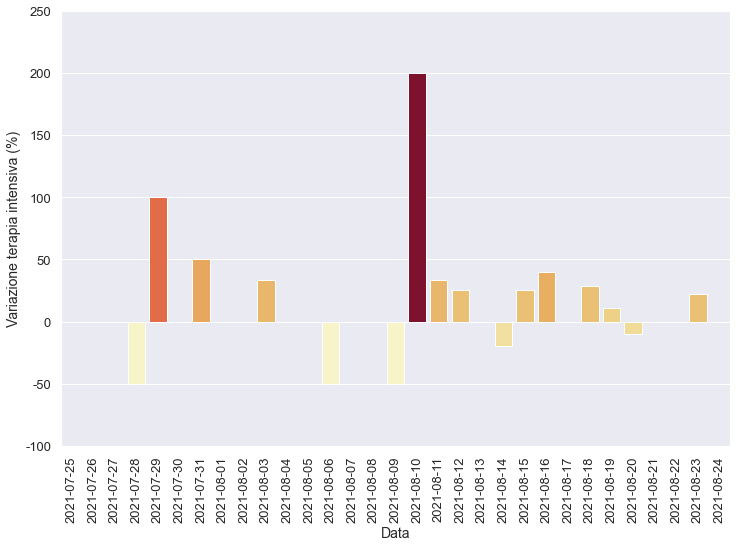

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

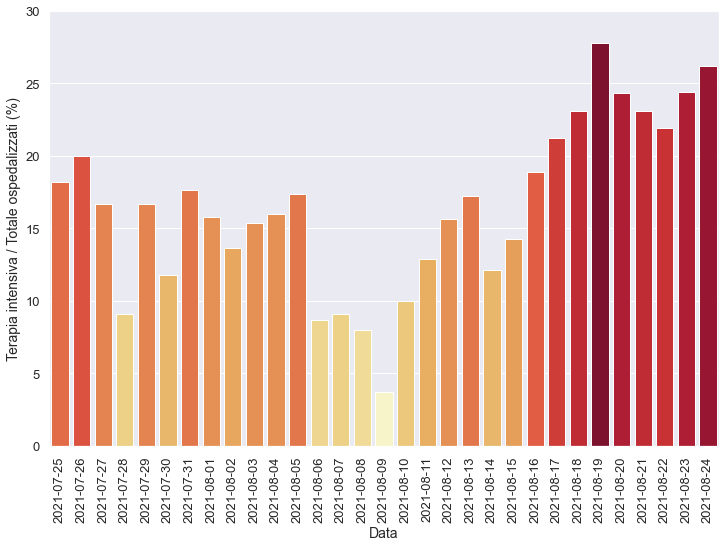

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

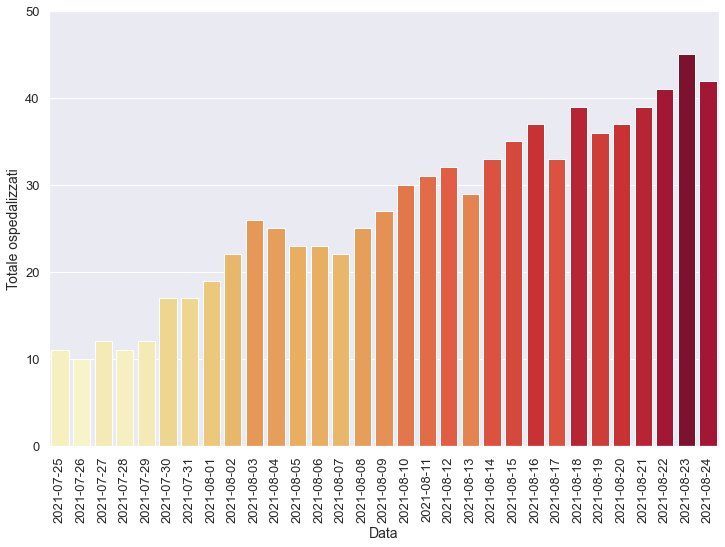

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

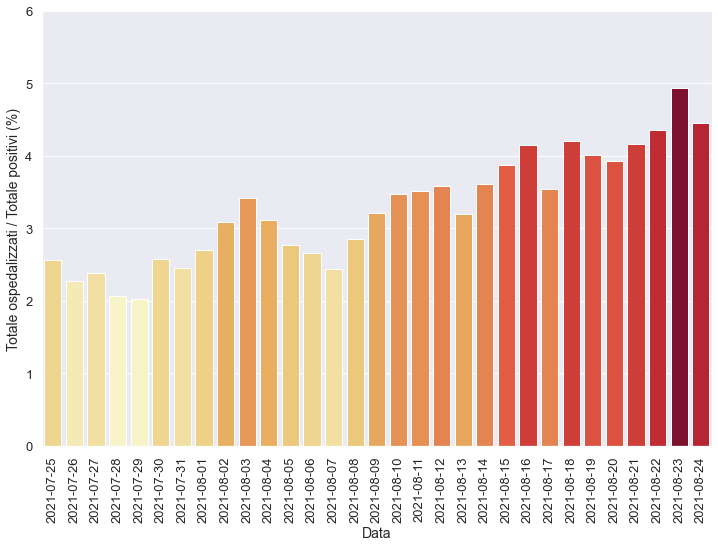

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

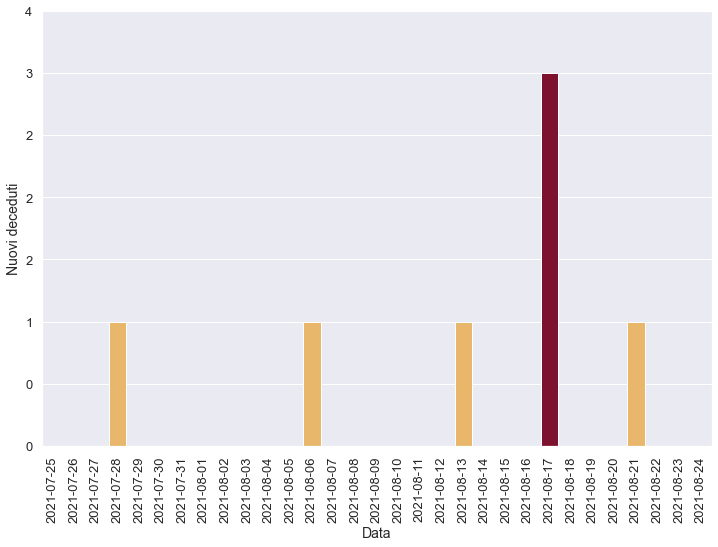

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

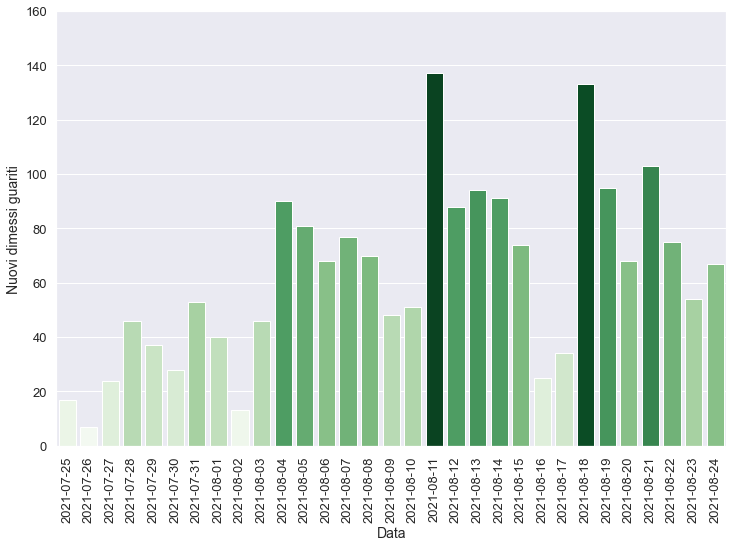

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-08-17T17:00:00,6,Friuli Venezia Giulia,26,7,33,899,932,40,79,...,3.0,6802.0,1378.0,44.0,21.21,3.54,1.16,5.73,0.00,4.48
1,2021-08-18T17:00:00,6,Friuli Venezia Giulia,30,9,39,888,927,-5,128,...,0.0,7238.0,1490.0,-11.0,23.08,4.21,1.77,8.59,28.57,-0.54
2,2021-08-19T17:00:00,6,Friuli Venezia Giulia,26,10,36,861,897,-30,68,...,0.0,5184.0,1190.0,-27.0,27.78,4.01,1.31,5.71,11.11,-3.24
3,2021-08-20T17:00:00,6,Friuli Venezia Giulia,28,9,37,904,941,44,113,...,0.0,6613.0,1284.0,43.0,24.32,3.93,1.71,8.80,-10.00,4.91
4,2021-08-21T17:00:00,6,Friuli Venezia Giulia,30,9,39,899,938,-3,103,...,1.0,7274.0,2002.0,-5.0,23.08,4.16,1.42,5.14,0.00,-0.32
5,2021-08-22T17:00:00,6,Friuli Venezia Giulia,32,9,41,899,940,2,78,...,0.0,4541.0,1503.0,0.0,21.95,4.36,1.72,5.19,0.00,0.21
6,2021-08-23T17:00:00,6,Friuli Venezia Giulia,34,11,45,866,911,-29,25,...,0.0,1476.0,330.0,-33.0,24.44,4.94,1.69,7.58,22.22,-3.09
7,2021-08-24T17:00:00,6,Friuli Venezia Giulia,31,11,42,901,943,32,99,...,0.0,7851.0,1665.0,35.0,26.19,4.45,1.26,5.95,0.00,3.51


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

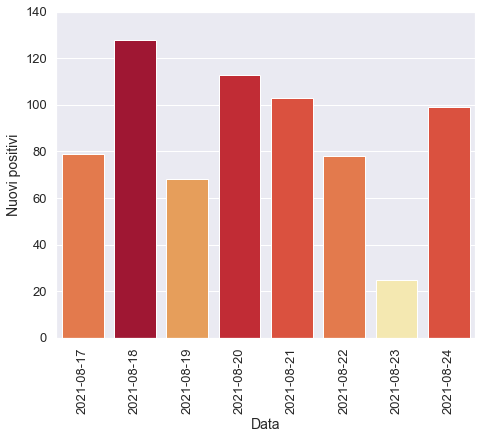

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

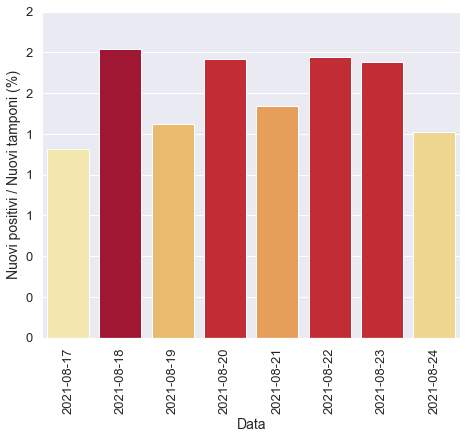

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

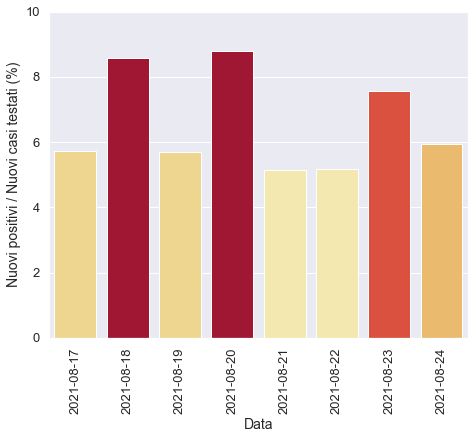

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

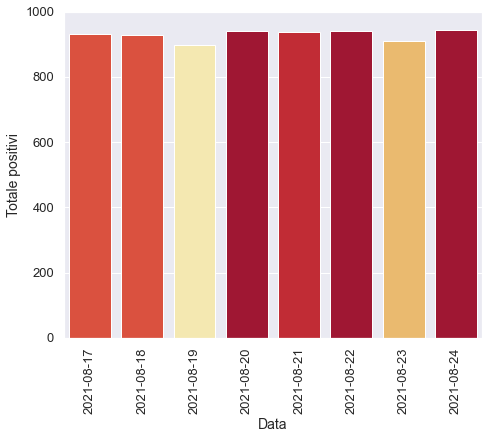

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

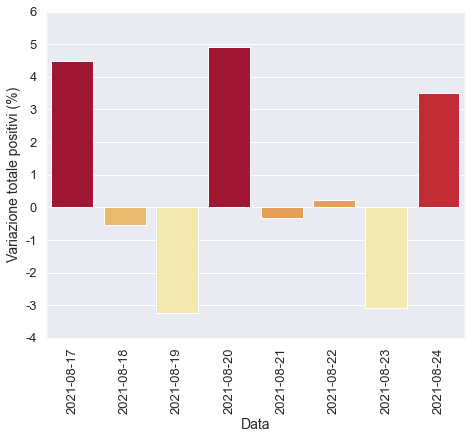

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

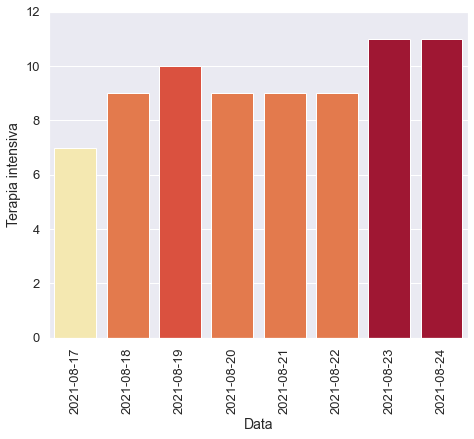

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

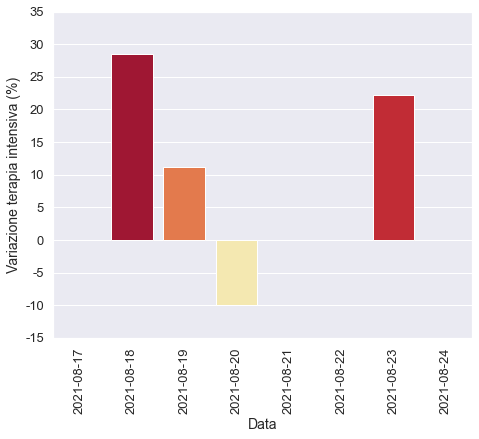

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

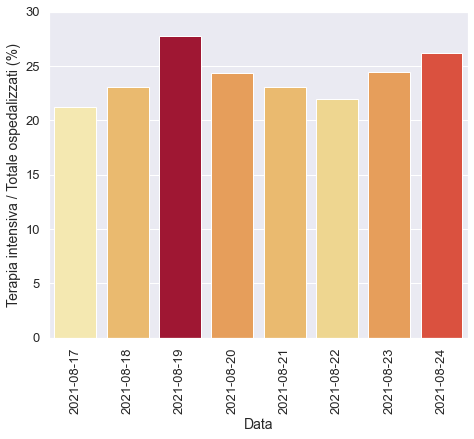

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

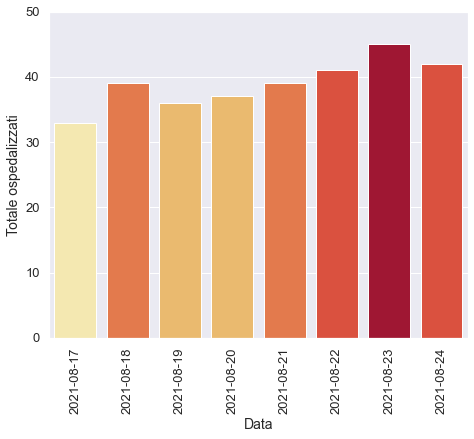

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

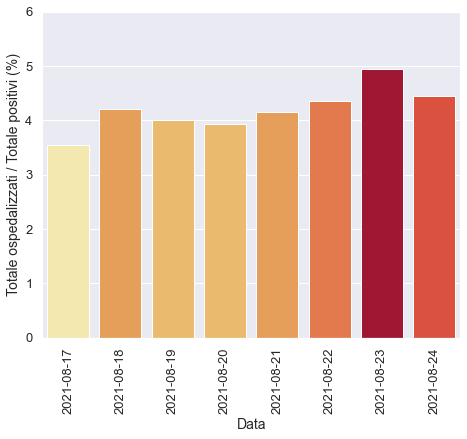

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

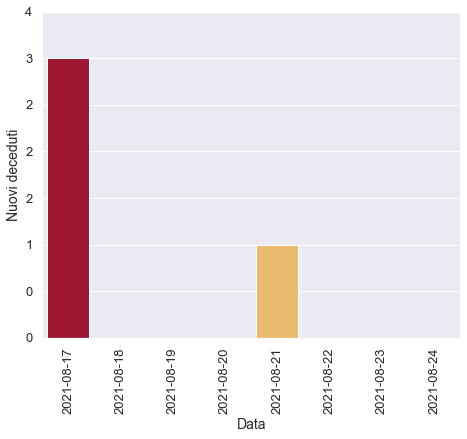

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

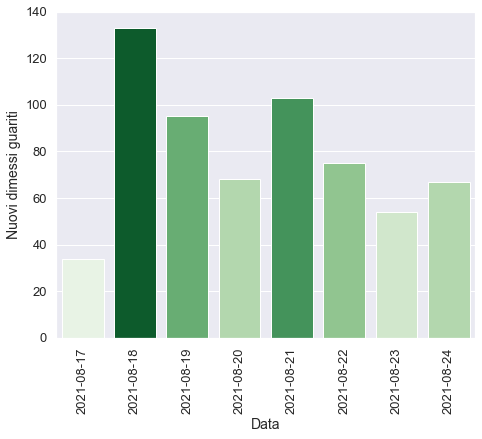

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)